<a href="https://colab.research.google.com/github/vdrobin1/first/blob/main/lstmJefferson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install pingouin --upgrade

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/MyDrive/Summer21

/content/drive/MyDrive/Summer21


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline

In [6]:
Jefferson=pd.DataFrame(pd.read_csv("JeffersonDailyM.csv"))

In [7]:
Jefferson

,Unnamed: 0,DATE,Daily_WL,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,YEAR
0,0,2010-12-01,28.652500,USW00013876,"BIRMINGHAM AIRPORT, AL US",33.56556,-86.745,187.5,0.0,0.0,0.0,0.0,0.0,0.0,49.0,30.0,2010
1,1,2010-12-02,28.609167,USW00013876,"BIRMINGHAM AIRPORT, AL US",33.56556,-86.745,187.5,0.0,0.0,0.0,0.0,0.0,0.0,54.0,28.0,2010
2,2,2010-12-03,28.607500,USW00013876,"BIRMINGHAM AIRPORT, AL US",33.56556,-86.745,187.5,0.0,0.0,0.0,0.0,0.0,0.0,61.0,33.0,2010
3,3,2010-12-04,28.622500,USW00013876,"BIRMINGHAM AIRPORT, AL US",33.56556,-86.745,187.5,0.0,0.0,0.0,0.0,0.0,0.0,61.0,37.0,2010
4,4,2010-12-05,28.833333,USW00013876,"BIRMINGHAM AIRPORT, AL US",33.56556,-86.745,187.5,0.0,0.0,0.0,0.0,0.0,0.0,43.0,34.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,3439,2020-05-01,18.150000,USW00013876,"BIRMINGHAM AIRPORT, AL US",33.56556,-86.745,187.5,0.0,0.0,0.0,0.0,0.0,62.0,78.0,46.0,2020
3440,3440,2020-05-02,18.150000,USW00013876,"BIRMINGHAM AIRPORT, AL US",33.56556,-86.745,187.5,0.0,0.0,0.0,0.0,0.0,67.0,83.0,52.0,2020
3441,3441,2020-05-03,18.150000,USW00013876,"BIRMINGHAM AIRPORT, AL US",33.56556,-86.745,187.5,0.0,0.0,0.0,0.0,0.0,73.0,85.0,62.0,2020
3442,3442,2020-05-04,18.150000,USW00013876,"BIRMINGHAM AIRPORT, AL US",33.56556,-86.745,187.5,0.0,0.0,0.0,0.0,0.0,75.0,87.0,63.0,2020


One thing to note is that the daily water levels in Jefferson is noticeably higher that Colbert or Baldwin.

## **Part 1**

In [8]:
# Importing Training Set
dataset_train = Jefferson[['DATE', 'Daily_WL', 'PRCP','TMAX','TMIN']].copy()

In [9]:
dataset_train.head()

,DATE,Daily_WL,PRCP,TMAX,TMIN
0,2010-12-01,28.652500,0.0,49.0,30.0
1,2010-12-02,28.609167,0.0,54.0,28.0
2,2010-12-03,28.607500,0.0,61.0,33.0
3,2010-12-04,28.622500,0.0,61.0,37.0
4,2010-12-05,28.833333,0.0,43.0,34.0


In [63]:
print(dataset_train['Daily_WL'].max())
print(dataset_train['Daily_WL'].min())

31.555000000000003
16.2225


In [10]:
import scipy.stats as stats

In [11]:
#dataset_train[['Daily_WL']].apply(stats.zscore)

In [12]:
#dataset_train['Daily_WL']=dataset_train[['Daily_WL']].apply(stats.zscore)

In [13]:
dataset_train

,DATE,Daily_WL,PRCP,TMAX,TMIN
0,2010-12-01,28.652500,0.0,49.0,30.0
1,2010-12-02,28.609167,0.0,54.0,28.0
2,2010-12-03,28.607500,0.0,61.0,33.0
3,2010-12-04,28.622500,0.0,61.0,37.0
4,2010-12-05,28.833333,0.0,43.0,34.0
...,...,...,...,...,...
3439,2020-05-01,18.150000,0.0,78.0,46.0
3440,2020-05-02,18.150000,0.0,83.0,52.0
3441,2020-05-03,18.150000,0.0,85.0,62.0
3442,2020-05-04,18.150000,0.0,87.0,63.0


In [14]:
#https://www.askpython.com/python/coefficient-of-determination
x_values = dataset_train['Daily_WL']
y_values = dataset_train['PRCP']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.0028136738522869698


In [15]:

from sklearn.metrics import r2_score 
R_square = r2_score(dataset_train['Daily_WL'], dataset_train['PRCP']) 
print('Coefficient of Determination', R_square) 


Coefficient of Determination -42.83397986514378


In [16]:
x_values = dataset_train['Daily_WL']
y_values = dataset_train['TMAX']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.007447573644463106


In [17]:
x_values = dataset_train['Daily_WL']
y_values = dataset_train['TMIN']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.005882035380605993


In [18]:

# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:5]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['DATE'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (3444, 5)
All timestamps == 3444
Featured selected: ['Daily_WL', 'PRCP', 'TMAX', 'TMIN']


In [19]:
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

dataset_train = dataset_train.astype(float)

# Using multiple features (predictors)
training_set = dataset_train.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (3444, 4).


array([[28.6525    ,  0.        , 49.        , 30.        ],
       [28.60916667,  0.        , 54.        , 28.        ],
       [28.6075    ,  0.        , 61.        , 33.        ],
       ...,
       [18.15      ,  0.        , 85.        , 62.        ],
       [18.15      ,  0.        , 87.        , 63.        ],
       [18.15      ,  0.        , 80.        , 62.        ]])

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[ 0.99588071],
       [ 0.98441561],
       [ 0.98397464],
       ...,
       [-1.78286235],
       [-1.78286235],
       [-1.78286235]])

In [21]:
training_set_scaled

array([[ 0.99588071, -0.36067296, -1.66874651, -1.50735601],
       [ 0.98441561, -0.36067296, -1.34189488, -1.63366892],
       [ 0.98397464, -0.36067296, -0.88430259, -1.31788665],
       ...,
       [-1.78286235, -0.36067296,  0.68458524,  0.51365048],
       [-1.78286235, -0.36067296,  0.81532589,  0.57680693],
       [-1.78286235, -0.36067296,  0.35773361,  0.51365048]])

In [22]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 7   # Number of days we want top predict into the future
n_past = 30    # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (3408, 30, 3).
y_train shape == (3408, 1).


### **PART 2**

In [23]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import layers
#from keras.layers import Adam

In [24]:
dataset_train

,Daily_WL,PRCP,TMAX,TMIN
0,28.652500,0.0,49.0,30.0
1,28.609167,0.0,54.0,28.0
2,28.607500,0.0,61.0,33.0
3,28.622500,0.0,61.0,37.0
4,28.833333,0.0,43.0,34.0
...,...,...,...,...
3439,18.150000,0.0,78.0,46.0
3440,18.150000,0.0,83.0,52.0
3441,18.150000,0.0,85.0,62.0
3442,18.150000,0.0,87.0,63.0


In [25]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
#model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [26]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/30
11/11 [==============================] - ETA: 0s - loss: 0.2552
Epoch 1: val_loss improved from inf to 0.05759, saving model to weights.h5
11/11 [==============================] - 27s 739ms/step - loss: 0.2552 - val_loss: 0.0576 - lr: 0.0100
Epoch 2/30
11/11 [==============================] - ETA: 0s - loss: 0.1230
Epoch 2: val_loss improved from 0.05759 to 0.04899, saving model to weights.h5
11/11 [==============================] - 4s 337ms/step - loss: 0.1230 - val_loss: 0.0490 - lr: 0.0100
Epoch 3/30
11/11 [==============================] - ETA: 0s - loss: 0.1049
Epoch 3: val_loss did not improve from 0.04899
11/11 [==============================] - 3s 221ms/step - loss: 0.1049 - val_loss: 0.0503 - lr: 0.0100
Epoch 4/30
11/11 [==============================] - ETA: 0s - loss: 0.0955
Epoch 4: val_loss improved from 0.04899 to 0.04512, saving model to weights.h5
11/11 [==============================] - 3s 226ms/step - loss: 0.0955 - val_loss: 0.0451 - lr: 0.0100
Epoch 5/30


## **PART 3**

In [27]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [28]:
datelist_future

[Timestamp('2020-05-05 00:00:00', freq='D'),
 Timestamp('2020-05-06 00:00:00', freq='D'),
 Timestamp('2020-05-07 00:00:00', freq='D'),
 Timestamp('2020-05-08 00:00:00', freq='D'),
 Timestamp('2020-05-09 00:00:00', freq='D'),
 Timestamp('2020-05-10 00:00:00', freq='D'),
 Timestamp('2020-05-11 00:00:00', freq='D')]

In [29]:
# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [30]:
predictions_future

array([[-1.8842365],
       [-2.0294156],
       [-1.8998448],
       [-1.8225105],
       [-1.7053449],
       [-1.5868825],
       [-1.4792784]], dtype=float32)

In [31]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Daily_WL']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Daily_WL']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

,Daily_WL
2011-02-05,27.946268
2011-02-06,27.957109
2011-02-07,27.719107


In [32]:
PREDICTIONS_FUTURE

,Daily_WL
2020-05-05,17.766848
2020-05-06,17.218130
2020-05-07,17.707855
2020-05-08,18.000147
2020-05-09,18.442984
2020-05-10,18.890722
2020-05-11,19.297422


In [33]:
# Parse training set timestamp for better visualization
dataset_train = pd.DataFrame(dataset_train, columns=cols)
dataset_train.index = datelist_train
dataset_train.index = pd.to_datetime(dataset_train.index)

In [34]:
dataset_train

,Daily_WL,PRCP,TMAX,TMIN
2010-12-01,28.652500,0.0,49.0,30.0
2010-12-02,28.609167,0.0,54.0,28.0
2010-12-03,28.607500,0.0,61.0,33.0
2010-12-04,28.622500,0.0,61.0,37.0
2010-12-05,28.833333,0.0,43.0,34.0
...,...,...,...,...
2020-05-01,18.150000,0.0,78.0,46.0
2020-05-02,18.150000,0.0,83.0,52.0
2020-05-03,18.150000,0.0,85.0,62.0
2020-05-04,18.150000,0.0,87.0,63.0


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


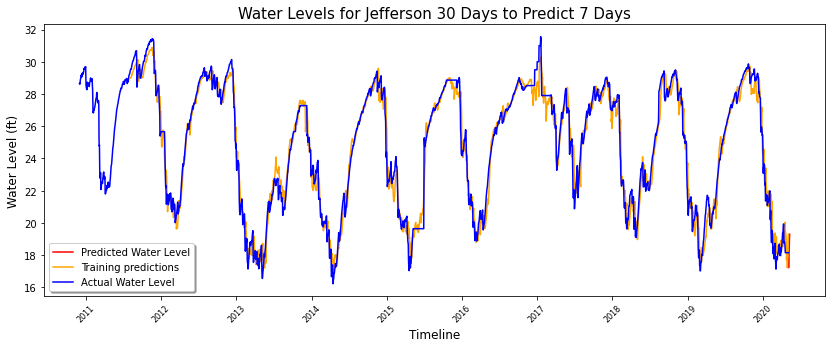

In [35]:
from pyparsing.core import PrecededBy
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2011-08-05'
START_DATE_FOR_PLOTTING2 = '2010-12-01'

test_Jeff30=plt.figure()
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Daily_WL'], color='r', label='Predicted Water Level')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Daily_WL'], color='orange', label='Training predictions')
plt.plot(dataset_train.loc[START_DATE_FOR_PLOTTING2:].index, dataset_train.loc[START_DATE_FOR_PLOTTING2:]['Daily_WL'], color='b', label='Actual Water Level')

# Create the data set
#x = PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index
#y = dataset_train.loc[START_DATE_FOR_PLOTTING:]['Daily_WL']
#Define the confidence interval
#ci = 0.1 * np.std(y) / np.mean(y)
# Plot the confidence interval
#plt.fill_between(x, (y-ci), (y+ci), color='blue', alpha=0.1)
#plt.show()

plt.legend(shadow=True)
plt.title('Water Levels for Jefferson 30 Days to Predict 7 Days', family='Arial', fontsize=15)
plt.xlabel('Timeline', family='Arial', fontsize=12)
plt.ylabel('Water Level (ft)', family='Arial', fontsize=12)
plt.xticks(rotation=45, fontsize=8)
test_Jeff30.show()



In [36]:
test_Jeff30.savefig('test_Jeff30.png',dpi=400,bbox_inches='tight')

In [37]:
PREDICTIONS_FUTURE=PREDICTIONS_FUTURE.reset_index()
PREDICTIONS_FUTURE=PREDICTIONS_FUTURE.rename(columns={'index':'DATE'})
PREDICTION_TRAIN=PREDICTION_TRAIN.reset_index()
PREDICTION_TRAIN=PREDICTION_TRAIN.rename(columns={'index':'DATE'})
PREDICTION_TRAIN

,DATE,Daily_WL
0,2011-02-05,27.946268
1,2011-02-06,27.957109
2,2011-02-07,27.719107
3,2011-02-08,27.365396
4,2011-02-09,27.626587
...,...,...
3373,2020-05-01,17.707855
3374,2020-05-02,18.000147
3375,2020-05-03,18.442984
3376,2020-05-04,18.890722


In [38]:
PREDICTION_TRAIN['DATE']= pd.to_datetime(PREDICTION_TRAIN['DATE'])
PREDICTIONS_FUTURE['DATE']=pd.to_datetime(PREDICTIONS_FUTURE['DATE'])

In [39]:
#Jefferson['Daily_WL']=Jefferson[['Daily_WL']].apply(stats.zscore)
jeff = Jefferson[['DATE', 'Daily_WL', 'PRCP']].copy()
jeff['DATE']= pd.to_datetime(jeff['DATE'])
jeff

,DATE,Daily_WL,PRCP
0,2010-12-01,28.652500,0.0
1,2010-12-02,28.609167,0.0
2,2010-12-03,28.607500,0.0
3,2010-12-04,28.622500,0.0
4,2010-12-05,28.833333,0.0
...,...,...,...
3439,2020-05-01,18.150000,0.0
3440,2020-05-02,18.150000,0.0
3441,2020-05-03,18.150000,0.0
3442,2020-05-04,18.150000,0.0


In [40]:
error=pd.merge(jeff,PREDICTION_TRAIN, on='DATE')
error

,DATE,Daily_WL_x,PRCP,Daily_WL_y
0,2011-02-05,26.860000,0.00,27.946268
1,2011-02-06,26.875833,0.00,27.957109
2,2011-02-07,26.823333,0.13,27.719107
3,2011-02-08,27.033333,0.00,27.365396
4,2011-02-09,26.988333,0.08,27.626587
...,...,...,...,...
3373,2020-05-01,18.150000,0.00,17.707855
3374,2020-05-02,18.150000,0.00,18.000147
3375,2020-05-03,18.150000,0.00,18.442984
3376,2020-05-04,18.150000,0.00,18.890722


In [41]:
error=error.rename(columns={'Daily_WL_x':'Actual', 'Daily_WL_y':'Prediction'})
error

,DATE,Actual,PRCP,Prediction
0,2011-02-05,26.860000,0.00,27.946268
1,2011-02-06,26.875833,0.00,27.957109
2,2011-02-07,26.823333,0.13,27.719107
3,2011-02-08,27.033333,0.00,27.365396
4,2011-02-09,26.988333,0.08,27.626587
...,...,...,...,...
3373,2020-05-01,18.150000,0.00,17.707855
3374,2020-05-02,18.150000,0.00,18.000147
3375,2020-05-03,18.150000,0.00,18.442984
3376,2020-05-04,18.150000,0.00,18.890722


In [42]:
 #https://towardsdatascience.com/how-to-calculate-confidence-intervals-in-python-a8625a48e62b
 #Compute 95% Confidence Interval for actual water levels using Normal distribution for large data sets 
import numpy as np
import scipy.stats as st

#define sample data
data = error['Actual']

#create 95% confidence interval for actual groundwater table levels
st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))


#the values given will be your (pred_lower,pred_upper)

(24.682699481581206, 24.937237364678825)

In [43]:
#Number needed to graph C.I. for Actaul groundwater table levels so we'll use + or - q
q= (0.012899489568820297--0.05444594002633131)/2
q

0.0336727147975758

In [44]:
error=error.drop(columns=['PRCP'])
error

,DATE,Actual,Prediction
0,2011-02-05,26.860000,27.946268
1,2011-02-06,26.875833,27.957109
2,2011-02-07,26.823333,27.719107
3,2011-02-08,27.033333,27.365396
4,2011-02-09,26.988333,27.626587
...,...,...,...
3373,2020-05-01,18.150000,17.707855
3374,2020-05-02,18.150000,18.000147
3375,2020-05-03,18.150000,18.442984
3376,2020-05-04,18.150000,18.890722


In [45]:
error['ERROR']=abs(error['Actual']-error['Prediction'])
error

,DATE,Actual,Prediction,ERROR
0,2011-02-05,26.860000,27.946268,1.086268
1,2011-02-06,26.875833,27.957109,1.081276
2,2011-02-07,26.823333,27.719107,0.895773
3,2011-02-08,27.033333,27.365396,0.332063
4,2011-02-09,26.988333,27.626587,0.638254
...,...,...,...,...
3373,2020-05-01,18.150000,17.707855,0.442145
3374,2020-05-02,18.150000,18.000147,0.149853
3375,2020-05-03,18.150000,18.442984,0.292984
3376,2020-05-04,18.150000,18.890722,0.740722


In [46]:
#calculating RMSE from data frame
from sklearn.metrics import mean_squared_error 
realVals = error['Actual']
predictedVals = error['Prediction']
mse = mean_squared_error(realVals, predictedVals)
# If you want the root mean squared error
# rmse = mean_squared_error(realVals, predictedVals, squared = False)
mse

0.477876460399958

0.0002164204915402479
3.575293172200521


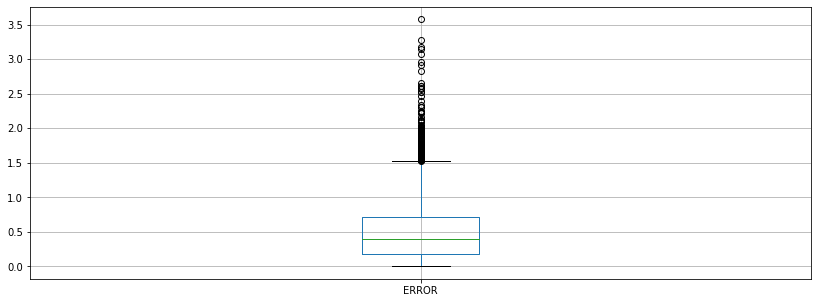

In [47]:
error.boxplot(column=['ERROR'], return_type='axes')
print(error['ERROR'].min())
print(error['ERROR'].max())

Ironically the error is significantly smaller overall than Colbert.

In [48]:
PREDICTIONS_FUTURE

,DATE,Daily_WL
0,2020-05-05,17.766848
1,2020-05-06,17.218130
2,2020-05-07,17.707855
3,2020-05-08,18.000147
4,2020-05-09,18.442984
5,2020-05-10,18.890722
6,2020-05-11,19.297422


https://rtaubes.pythonanywhere.com/lstm-1/

1.   calculate difference between predicted and actual training set. Calculate MSE(mean square error) of the difference. The MSE may be used as criteria when to stop training of a network
2.   if the difference has sufficient mean value, the network has too simple structure or require additional training steps.
3. if the difference is too small, it is possible that a network if overfitted.
4. if a mean of the difference is close to zero, estimate a confidence interval using the mean and deviation of the calculated error.



In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
error.dtypes

DATE          datetime64[ns]
Actual               float64
Prediction           float32
ERROR                float64
dtype: object

In [51]:
# Given values
Y_true = error['Actual']  #(original values)
  
# calculated values
Y_pred = error['Prediction']  # Y_pred = Y'
  
# Calculation of Mean Squared Error (MSE)
mean_squared_error(Y_true,Y_pred)

0.477876460399958

https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error/


What does the Mean Squared Error Tell You?
The smaller the mean squared error, the closer you are to finding the line of best fit. Depending on your data, it may be impossible to get a very small value for the mean squared error. For example, the above data is scattered wildly around the regression line, so 6.08 is as good as it gets (and is in fact, the line of best fit). Note that I used an online calculator to get the regression line; where the MSE really comes in handy is if you were finding an equation for the regression line by hand: you could try several equations, and the one that gave you the smallest MSE would be the line of best fit.

In [52]:
#if a mean of the difference is close to zero, estimate a confidence interval using the mean and deviation of the calculated error.
error['ERROR'].mean()

0.5201637919358026

0.0002164204915402479
3.575293172200521


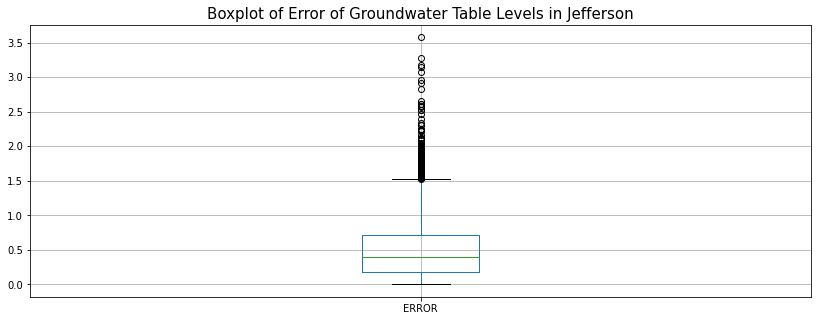

In [62]:
fig100 = plt.figure()
plt.title("Boxplot of Error of Groundwater Table Levels in Jefferson", fontsize=15,ha='center')
error_MAD=error.boxplot(column=['ERROR'], return_type='axes')
fig100.savefig('boxplot1_Jeff.png',dpi=400,bbox_inches='tight')
print(error['ERROR'].min())
print(error['ERROR'].max())

In [54]:
error.describe()

,Actual,Prediction,ERROR
count,3378.000000,3378.000000,3378.000000
mean,24.809968,24.779625,0.520164
std,3.774020,3.654567,0.455376
min,16.222500,17.003914,0.000216
25%,21.461250,21.476197,0.186154
50%,25.660000,25.762029,0.396372
75%,28.127292,28.023367,0.720981
max,31.555000,30.884056,3.575293


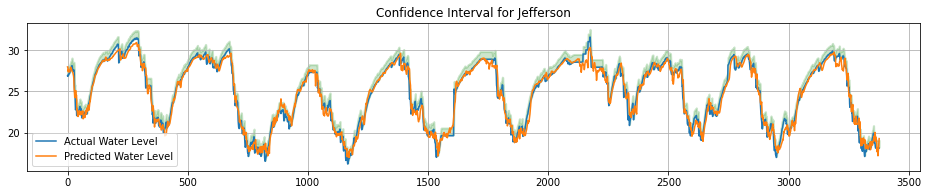

In [55]:
look_back = 500
std_part = 0.9  # use values from 0 to 1 if you have an idea what part of STD should be used.
test2_Jeff30=plt.figure(figsize=(16, 6))
ax1 = plt.subplot(211)
act_lb = error['Prediction']
pred_lb = error['Actual']
err_std = error['ERROR'].std(axis=0)
err_mean = error['ERROR'].mean(axis=0)
pred_upper = pred_lb + err_mean + err_std * std_part
pred_lower = pred_lb + err_mean - err_std * std_part
err_x = np.linspace(0, len(act_lb)-1, len(act_lb))
plt.plot(error['Actual'], label='Actual Water Level ')
plt.plot(error['Prediction'], label='Predicted Water Level')
plt.fill_between(x=err_x, y1=pred_upper, y2=pred_lower, color='green', lw=2, alpha=0.2)
plt.legend()
plt.grid()
plt.title('Confidence Interval for Jefferson')

test2_Jeff30.show()

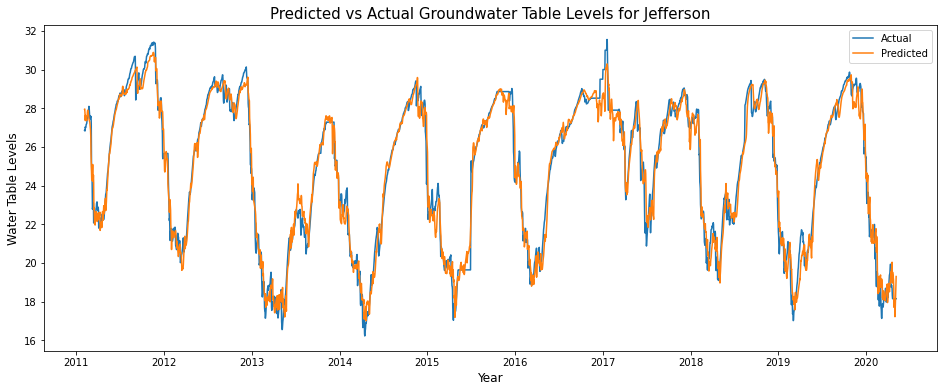

In [56]:
graph1_Jeff=plt.figure(figsize=(16, 6))
plt.plot(error['DATE'], error['Actual'], label = "Actual")
plt.plot(error['DATE'], error['Prediction'], label = "Predicted")
plt.title("Predicted vs Actual Groundwater Table Levels for Jefferson",fontsize=15,ha='center')
plt.xlabel("Year",fontsize=12,ha='center')
plt.ylabel("Water Table Levels",fontsize=12,ha='center')
plt.legend()
plt.show()

graph1_Jeff.savefig('graph1_Jeff.png')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


slope b1 is 0.9521039967043526
intercept b0 is 1.1579510304966654


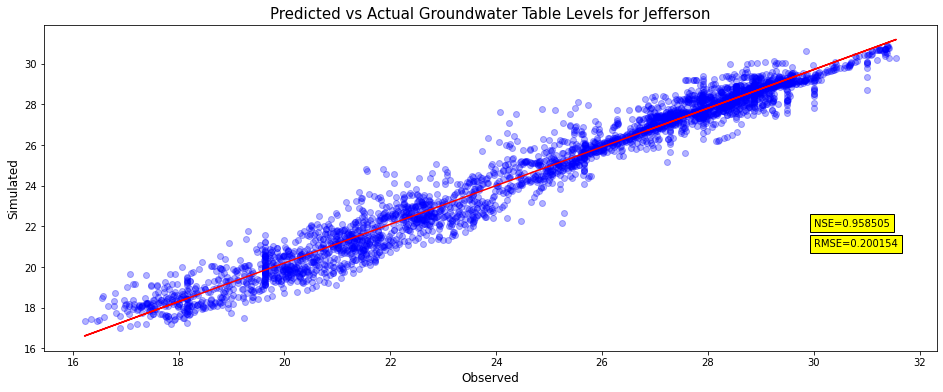

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

graph2_Jeff=plt.figure(figsize=(16, 6))

x=np.array(error['Actual'])
y=np.array(error['Prediction'])

n = np.size(x)
  
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('slope b1 is', b1)
print('intercept b0 is', b0)
  
#plt.scatter(x,y)
#plt.xlabel('Independent variable X')
#plt.ylabel('Dependent variable y')

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'blue', alpha = 0.3)
plt.plot(x, y_pred, color = 'red')
plt.xlabel('Observed',fontsize=12,ha='center')
plt.ylabel('Simulated',fontsize=12,ha='center')
plt.text(30,22,'NSE=0.966438',bbox={"fc":"yellow"})
plt.text(30,21,'RMSE=0.666549',bbox={"fc":"yellow"})

plt.title("Predicted vs Actual Groundwater Table Levels for Jefferson", fontsize=15,ha='center')
graph2_Jeff.savefig('graph2_Jeff.png',dpi=400,bbox_inches='tight')

In [58]:
#Calculate NSE https://agrimetsoft.com/calculators/Nash%20Sutcliffe%20model%20Efficiency%20coefficient
a1=np.array(error['Actual']) 
a2=np.array(error['Prediction']) 
denominator = np.sum((a1 - np.mean(a1)) ** 2)
numerator = np.sum((a2 - a1) ** 2)
nse_val = 1 - numerator / denominator
print(nse_val)

0.9664389225415633


In [59]:
x = x.reshape(-1,1)
regression_model = LinearRegression()
  
# Fit the data(train the model)
regression_model.fit(x, y)
  
# Predict
y_predicted = regression_model.predict(x)
  
# model evaluation
mse=mean_squared_error(y,y_predicted)
  
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)


# printing values
print('Slope:',regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [0.95210156]
Intercept: 1.1580129391891418
MSE: 0.444287588744697
Root mean squared error:  0.6665490145103337
R2 score:  0.9667247946355414


In [60]:
import scipy

NameError: ignored

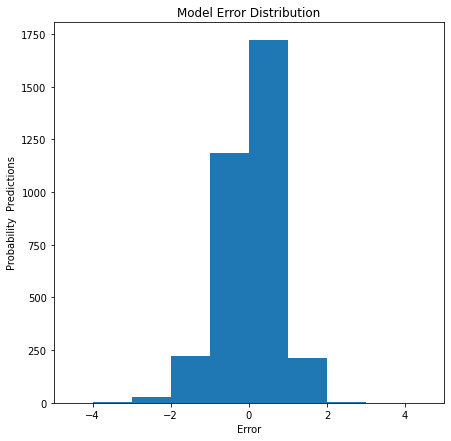

In [61]:
from scipy import stats
from scipy.stats import norm
"""
Calculate error from between target and predictions
(Based on merged data frame of test data and predictions)
"""
test=pd.DataFrame()
test['error'] = error['Actual'] - error['Prediction']

#Set plot size
plt.subplots(figsize=(7,7))
#Set X-Axis range
plt.xlim(-5,5)
plt.title('Model Error Distribution')
plt.ylabel('Probability  Predictions')
plt.xlabel('Error')
plt.hist(test['error'], bins=np.linspace(-20, 20, num=41, dtype=int));



plt.bar(np.arange(len(b)) - 0.5, p, width=1, facecolor='white')
plt.xlim(-0.5, n + 0.5)
plt.xlabel("Number of heads (k)")
plt.ylabel("P(k)")

plt.show()



from scipy.stats import norm
import statistics
    
# Plot between -30 and 30 with
# 0.1 steps.
x_axis = np.arange(-5, 5, 0.1)
    
# Calculating mean and standard 
# deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
    
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))

plt.show()

In [ ]:
# Generate a random sample.
a = np.array(test['error'])

# Count the occurrences in the sample.
b = a.count()

# p is the array of probabilities.
p = b / float(b.sum())

plt.bar(np.arange(len(b)) - 0.5, p, width=1, facecolor='white')
plt.xlim(-0.5, n + 0.5)
plt.xlabel("Number of heads (k)")
plt.ylabel("P(k)")

plt.show()

In [ ]:
#ax2 = plt.subplot(212, sharex=ax1)
#less_upp = act_lb < pred_upper
#more_lower = act_lb > pred_lower
#plt.plot(np.logical_and(less_upp, more_lower))
#plt.title("Out of bound error as 0")
#plt.grid()
#plt.setp(ax2.get_xticklabels(), visible=False);


In [ ]:
test2_Jeff30.savefig('CI2_Jeff30.png')

In [ ]:
stats_WL = pingouin.ttest(error['Actual'], error['Prediction'], paired=False)
stats_WL

In [ ]:
stats_WL = pingouin.ttest(Jefferson['Daily_WL'], Jefferson['PRCP'], paired=False)
stats_WL

In [ ]:
x_values = error['Actual']
y_values = error['Prediction']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

In [ ]:
x_values = dataset_train['Daily_WL']
y_values = dataset_train['TMIN']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

print(correlation_matrix)

In [ ]:
x_values = Jefferson['Daily_WL']
y_values = Jefferson['TMAX']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

print(correlation_matrix)

So, I performed t-test to test the accuracy of the predicitons versus the actual numbers. This a method of proving the accuracy of the model.


1.   A negative t-value indicates a reversal in the directionality of the effect, which has no bearing on the significance of the difference between groups.
2.   large degree of freedom can be interpreted as we have a sufficent amount of data
3. Low P values: A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

The test did reject the null (h =0), and the 90% confidence interval is that the mean is less than -0.01, which equivalent to saying it is in the interval [-Inf,-0.01].


